<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

Имеется проект, необходимо:

• загрузить и изучить данные;

• отметить на вопрос:

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 
 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
 
• предложить алгоритм преобразования данных для решения задачи и обосновать, почему качество линейной регрессии не поменяется;

• запрограммировать алгоритм, применив матричные операции и проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования, применить метрику R2.

Имеется датасет /datasets/insurance.csv с признаками: пол, возраст, зарплата, количество членов семьи застрахованного.

Целевым признаком является количество страховых выплат клиенту за последние 5 лет.

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [75]:
data = pd.read_csv('/datasets/insurance.csv')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [77]:
display(data.head(10))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [78]:
for column in data.columns:
    if column != 'Зарплата':
        unique_values = data[column].unique()
        print(f'Уникальные значения для колонки "{column}":')
        print(unique_values)

Уникальные значения для колонки "Пол":
[1 0]
Уникальные значения для колонки "Возраст":
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Уникальные значения для колонки "Члены семьи":
[1 0 2 4 3 5 6]
Уникальные значения для колонки "Страховые выплаты":
[0 1 2 3 5 4]


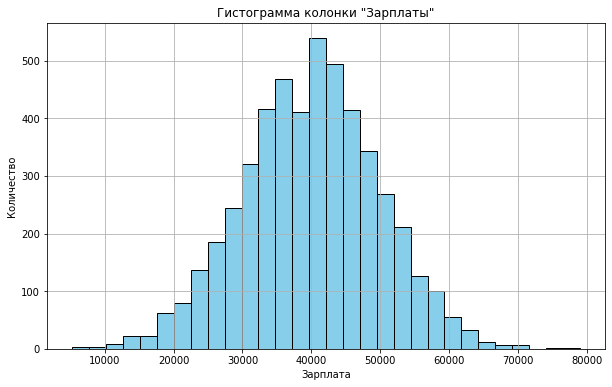

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(data['Зарплата'], bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма колонки "Зарплаты"')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

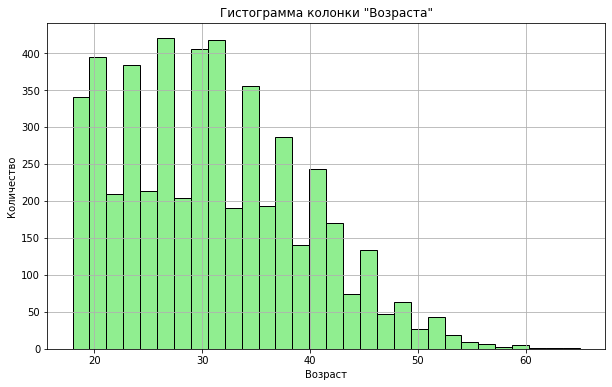

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(data['Возраст'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Гистограмма колонки "Возраста"')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

• Пол: либо мужской, либо женский

• Возраст: от 19 до 65 лет

• Члены семьи: от 0 до 6

• Страховые выплаты: от 0 до 5

Пропусков в таблице нет.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** ...

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
 



Ответ b.

Если умножить матрицу признаков X на обратимую матрицу, например, Y, чтобы получить матрицу признаков X', то:

$$X'=XY$$

$$ a'=X'w'=(XY)w'=X(Yw')$$ =>

=> $$a'=X(Yw')$$

Из условий задачи: w-это вектор весов линейной регрессии, а w'-вектор весов в линейной регрессии в преобразованной формуле.

$$w'=Yw$$

Т.о. параметры лр в новой задаче имеют взаимосвязь с параметрами лр в задаче изз условия при умножении на обратимую матрицу Y

Т.о. => $$a'=X(Yw')= XYY^{-1}w' = Xw = a$$

Ответ b доказан.

Воспользуюсь формулой из задания. Если признаки умножают на обратимую матрицу, то новые параметры модели вычисляются как:

$$
w_{new} = (\hat{X}^T\hat{X})^{-1}\hat{X}^Ty
$$

$\hat{X}$ - матрица признаков, умноженная на обратимую матрицу. Подставим выражение для $\hat{X}$:

$$
\hat{X} = XP
$$

Ыормула для новых параметров:

$$
w_{new} = ((XP)^T(XP))^{-1}(XP)^Ty
$$

УПо св-ву транспонирования и обратимости матриц: выражение $(XP)^T(XP)$ = $P^TX^TXP$. 

Т.о. новые параметры модели:

$$
w_{new} = (P^TX^TXP)^{-1}P^TX^Ty
$$

Матрица $(X^TX)^{-1}X^T$ является псевдообратной, =>:

$$
(X^TX)^{-1}X^T = (X^TX)^{\dagger}
$$

Поэтому выражение $$(P^TX^TXP)^{-1}P^TX^T$$ сокращается до $$P^{-1}(X^TX)^{\dagger}$$

Т.о. параметры модели после умножения признаков на обратимую матрицу выражаются через параметры модели до преобразования => качество модели не изменится. 

Параметры обозначаются как $w$, после преобразования обозначим их как $w_{\text{новые}}$. Если $\hat{X} = XP$, где $P$ — обратимая матрица, тогда $w_{\text{н}}$ выражаются через $w$ следующим образом:

$$
w_{\text{н}} = (X^TX)^{-1}X^Ty
$$

$$
w_{\text{н}} = ((XP)^T(XP))^{-1}(XP)^Ty
$$

$$
w_{\text{н}} = (P^TX^TXP)^{-1}P^TX^Ty
$$

$$
w_{\text{н}} = (P^T(X^TX)P)^{-1}P^TX^Ty
$$

Т.к. $(X^TX)^{-1}X^T$ — это псевдообратная матрица, выражение упрощается до:

$$
w_{\text{н}} = (P^T(X^TX)P)^{-1}P^TX^Ty = P^{-1}(X^TX)^{\dagger}X^Ty
$$

$X^TX$ не изменится при умножении на обратимую матриц, => $(X^TX)^{\dagger}X^T$ — это исходные веса $w$.

Т.о., $w_{\text{н}} = P^{-1}w$ => новые параметры модели связаны с исходными параметрами умножением на обратимую матрицу $P$. Как говорилось ранее, ачество модели не изменится после умножения признаков на обратимую матрицу.

**Алгоритм**

Каждый признак (колонку с данными) необходимо умножить на обратимую матрицу. Данное действие не изменит связь между ними и исходными переменными. Линейную регрессию надо будет обучить на новых признаках. После обучения модели, как сказано в условии, нужно применить метрику R2. 

Матрица необратима, если ее определитель равен нулю. Если он равен нулю => система лин ур имеет бесконечное количество решений. В таком случае необходимо перегенерировать матрицу.

**Обоснование**

Как уже было написано в предыдущем пункте, при умножении признаков на обратимую матрицу не изменяется взаимозависимость между признаками и целевой переменной. Предсказания модели на новых признаках будут такие же, как и на признаках в условии, качество модели при этом не изменится.

## Проверка алгоритма

In [81]:
X = data[['Пол', 'Возраст', 'Зарплата', 'Члены семьи']]
G = data['Страховые выплаты']

Определяем признаки и целевой признаки для обучения модели.

In [82]:
X_normalized = (X - X.mean()) / X.std()

Нормализирование признаков.

In [83]:
def generate_mat (size):
    while True:
        matrix = np.random.rand(size, size)
        if np.linalg.det(matrix) != 0:
            return matrix

Генерация в функции generate_mat происходит до тех пор, пока определитель не равен нулю. Функция из ранее импорт. библ. numpy.

In [84]:
Y = generate_mat (X_normalized.shape[1])

Обратимая матрица

In [85]:
X_transformed = X_normalized.dot(Y)

Умножение признаков на обратимую матрицу Р.

In [86]:
X_train, X_test, G_train, G_test = train_test_split(X_transformed, G, 
                                                    test_size=0.2, random_state=42)

In [87]:
model_original = LinearRegression()
model_original.fit(X_train, G_train)
G_original = model_original.predict(X_test)
r2_original = r2_score(G_test, G_original)

In [88]:
print("R2 до преобразования данных:", r2_original)

R2 до преобразования данных: 0.43686949231379957


In [89]:
model_transformed = LinearRegression()
model_transformed.fit(X_train, G_train)
G_transformed = model_transformed.predict(X_test)
r2_transformed = r2_score(G_test, G_transformed)

In [90]:
print("R2 после преобразования данных:", r2_transformed)

R2 после преобразования данных: 0.43686949231379957


**Вывод**

Проведено исследование данных страховых выплат за последние 5 лет. Всего есть 5000 строк данных, в которых содержатся данные о возрасте, зарплате, численности членов семьи и количестве выплат.

Проведено преобразование признаков с использованием обрамой матрицы, что сохранило характеристики данных и обеспечило анонимность клиентов при работе с информацией. Коэффициент детерминации R2 показал, что до и после преобразования значения R2 не менялись (0,4368694), что позволяет сделать вывод, что качестве линейной регрессии не меняется при преобразовании данных. Следовательно, данный метод эффективен для сохранения анонимности клиентов.